In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import *
# import utils; reload(utils)
# from utils import plots
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
#from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from keras import backend as K
#from theano import tensor as K
from scipy import ndimage

import numpy as np
import os
import PIL
from PIL import Image

In [2]:
os.getcwd()

'/nfsroot/data/home/s_jaysetty/Insofe_Cluster/hand_gesture'

In [7]:
# VGG model definition
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

# Load the VGG weigths

# path_weights_th = '/Users/Apple/Downloads/Insofe/AI/Transfer_Learning/20170916_Batch_29_CSE7321c_Transfer_Learning/vgg16_weights_th_dim_ordering_th_kernels.h5'
path_weights_tf = '/nfsroot/data/home/s_jaysetty/Insofe_Cluster/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
# path_weights_tf = 'vgg16_weights_tf_dim_ordering_tf_kernels.h5'
#theano
model = VGG_16(path_weights_tf)

#tensorflow
# model = VGG_16('vgg16_weights_tf_dim_ordering_tf_kernels.h5')

/nfsroot/data/home/s_jaysetty/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/nfsroot/data/home/s_jaysetty/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/nfsroot/data/home/s_jaysetty/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/nfsroot/data/home/s_jaysetty/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  del sys.path[0]
/nfsroot/data/home/s_jaysetty/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 

In [8]:
size = 224

def read_image(f):
    try:
        im = Image.open(f)
        im = im.resize((size, size), PIL.Image.NEAREST)
        im = np.asarray(im, dtype='float64')
        if len(im.shape)==2:
            im = im.reshape(im.shape[0],im.shape[1],1)
            im = im.repeat(3,axis=2)
        if im.shape[2]!=3:
            im = im[:,:,:3]
        im[:,:,0] -= 103.939
        im[:,:,1] -= 116.779
        im[:,:,2] -= 123.68
        im = im.reshape(1,224,224,3)
        return(im)
    except ValueError:
        print(f) #print the shape of im if it doesn't work correctly, don't reference this apriori

In [4]:
# Basic Check of read_image
path = '/home/s_jaysetty/Insofe_Cluster/hand_gesture/Triesch/'
im = read_image(path + 'kbrauei1.pgm')
# im = read_image('/home/s_jaysetty/Insofe_Cluster/hand_gesture/Triesch/bfritza2.pgm')
print(im.shape)
# model.layers[32]

(1, 224, 224, 3)


In [9]:
# with a Sequential model, get output of only 33rd layer
get_33rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[32].output])
layer_output = get_33rd_layer_output([im])[0]

In [21]:
img_files_marcel = []
path = '/home/s_jaysetty/Insofe_Cluster/hand_gesture/marcel/'
for root, dirs, files in os.walk(path):
    img_files_marcel.extend([f for f in files if f.endswith('.ppm')])
print(len(img_files_marcel))
print(img_files_marcel[:10])

5531
['A-complex01.ppm', 'A-complex02.ppm', 'A-complex03.ppm', 'A-complex04.ppm', 'A-complex05.ppm', 'A-complex06.ppm', 'A-complex07.ppm', 'A-complex08.ppm', 'A-complex09.ppm', 'A-complex10.ppm']


In [22]:
#Shuffle the Marcel images
n_files = len(img_files_marcel)
print('Total number of images:', n_files)

train_size = 10
sample_size = max(n_files,train_size)
print('Sample images taken:', sample_size)
sample_marcel = [img_files_marcel[i] for i in np.random.choice(len(img_files_marcel),size=sample_size, replace=False)]
print(sample_marcel[:10])
print(len(sample_marcel))

('Total number of images:', 5531)
('Sample images taken:', 5531)
['Point-train1216.ppm', 'C-train230.ppm', 'B-train319.ppm', 'Five-train351.ppm', 'A-train1029.ppm', 'Point-train0466.ppm', 'V-uniform21.ppm', 'A-train0108.ppm', 'B-train405.ppm', 'A-train0191.ppm']
5531


In [34]:
# Add Marcel images to train + val
# Remember in y_train for Marcel there are 2 additional states viz. {point, five}

k=0
x_train_marcel = []
y_train_marcel = []
path_marcel_1 = '/home/s_jaysetty/Insofe_Cluster/hand_gesture/marcel/'
print('Reading Marcel train images ...')
for file in sample_marcel[:4500]:
    if(k%600==0):
        print("Read {} images".format(k))
    im1 = read_image(path_marcel_1+file)
    temp = get_33rd_layer_output([im1])[0]
    x_train_marcel.append(temp[0])
    y_train_marcel.extend([0 if file[0]=='A' else 
                           1 if file[0]=='B' else 
                           2 if file[0]=='C' else 
                           3 if file[0]=='Five' else
                           4 if file[0]=='Point' else 5])
    k+=1
print('Successfully read {} Marcel train images ...'.format(k))

Reading Marcel train images ...
Read 0 images
Read 600 images
Read 1200 images
Read 1800 images
Read 2400 images
Read 3000 images
Read 3600 images
Read 4200 images
Successfully read 4500 Marcel train images ...


In [35]:
# Read the val images 
j=0
x_val_marcel = []
y_val_marcel = []
print('Reading val images ...')
path = '/home/s_jaysetty/Insofe_Cluster/hand_gesture/marcel/'
for file in sample_marcel[4500:]:
    if(j%300==0):
        print('Read {} images'.format(j))
    im = read_image(path+file)
    temp = get_33rd_layer_output([im])[0]
    x_val_marcel.append(temp[0])
    y_val_marcel.extend([0 if file[0]=='A' else 
                           1 if file[0]=='B' else 
                           2 if file[0]=='C' else 
                           3 if file[0]=='Five' else
                           4 if file[0]=='Point' else 5])
    j+=1
print('Successfully read {} Marcel val images ...'.format(j))

Reading val images ...
Read 0 images
Read 300 images
Read 600 images
Read 900 images
Successfully read 1031 Marcel val images ...


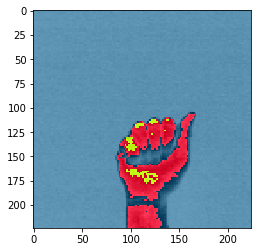

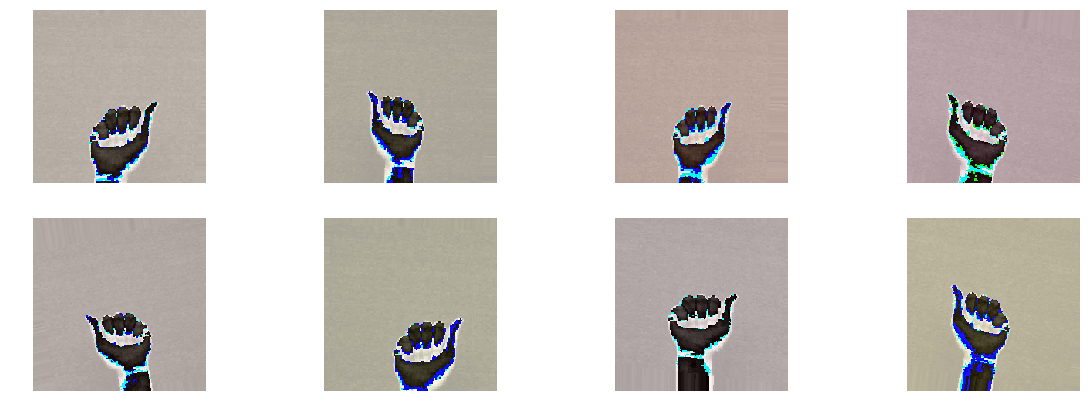

In [66]:
# Get eight examples of these augmented images

aug_imgs = [next(aug_iter)[0].astype(np.uint8) for i in range(8)]

# The original
plt.imshow(img[0])

# Augmented data
plots(aug_imgs, (20,7), 2)

In [85]:
# y_train_marcel = to_categorical(y_train_marcel)
# y_val_marcel = to_categorical(y_val_marcel)

In [66]:
# Add the MLP Layer
mlp = Sequential()
mlp.add(Dense(128, input_dim=4096, activation='relu'))
mlp.add(Dropout(0.2))
# mlp.add(Dense(128, activation='relu'))
# mlp.add(Dropout(0.5))
mlp.add(Dense(6, activation='sigmoid'))#try dense as 1 and sigmoid
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 128)               524416    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 6)                 774       
Total params: 525,190
Trainable params: 525,190
Non-trainable params: 0
_________________________________________________________________


In [69]:
#adam = Adam(lr=0.1)
mlp.compile(optimizer='Adam', 
            loss='categorical_crossentropy', 
            metrics=['acc'])

mlp.fit(np.array(x_train_marcel), to_categorical(y_train_marcel), nb_epoch=3, validation_data=(np.array(x_val_marcel), to_categorical(y_val_marcel)))

Train on 4500 samples, validate on 1031 samples
Epoch 1/3
4500/4500 [==============================] - 1s - loss: 0.0610 - acc: 0.9889 - val_loss: 0.2361 - val_acc: 0.9719
Epoch 2/3
4500/4500 [==============================] - 0s - loss: 0.0322 - acc: 0.9902 - val_loss: 0.2183 - val_acc: 0.9748
Epoch 3/3
4500/4500 [==============================] - 0s - loss: 0.0428 - acc: 0.9860 - val_loss: 0.2005 - val_acc: 0.9690


In [70]:
# Why is acc constant after sometime?
# Add more Marcel images
# Augment the data
# Save weights and then rerun
from keras.models import load_model
#
  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# # returns a compiled model
# # identical to the previous one
# model = load_model('my_model.h5')

In [71]:
model.save('my_model.h5')

In [72]:
model.save_weights('my_model_weights.h5')
# model.load_weights('my_model_weights.h5')

In [73]:
model2 = model.load_weights('my_model_weights.h5')